## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5,
                             class_sep=2, random_state=42)
df=pd.DataFrame(np.c_[X,y])
df.shape

(10000, 9)

In [4]:
# Check duplicate values and missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
0    10000 non-null float64
1    10000 non-null float64
2    10000 non-null float64
3    10000 non-null float64
4    10000 non-null float64
5    10000 non-null float64
6    10000 non-null float64
7    10000 non-null float64
8    10000 non-null float64
dtypes: float64(9)
memory usage: 703.2 KB


In [7]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0


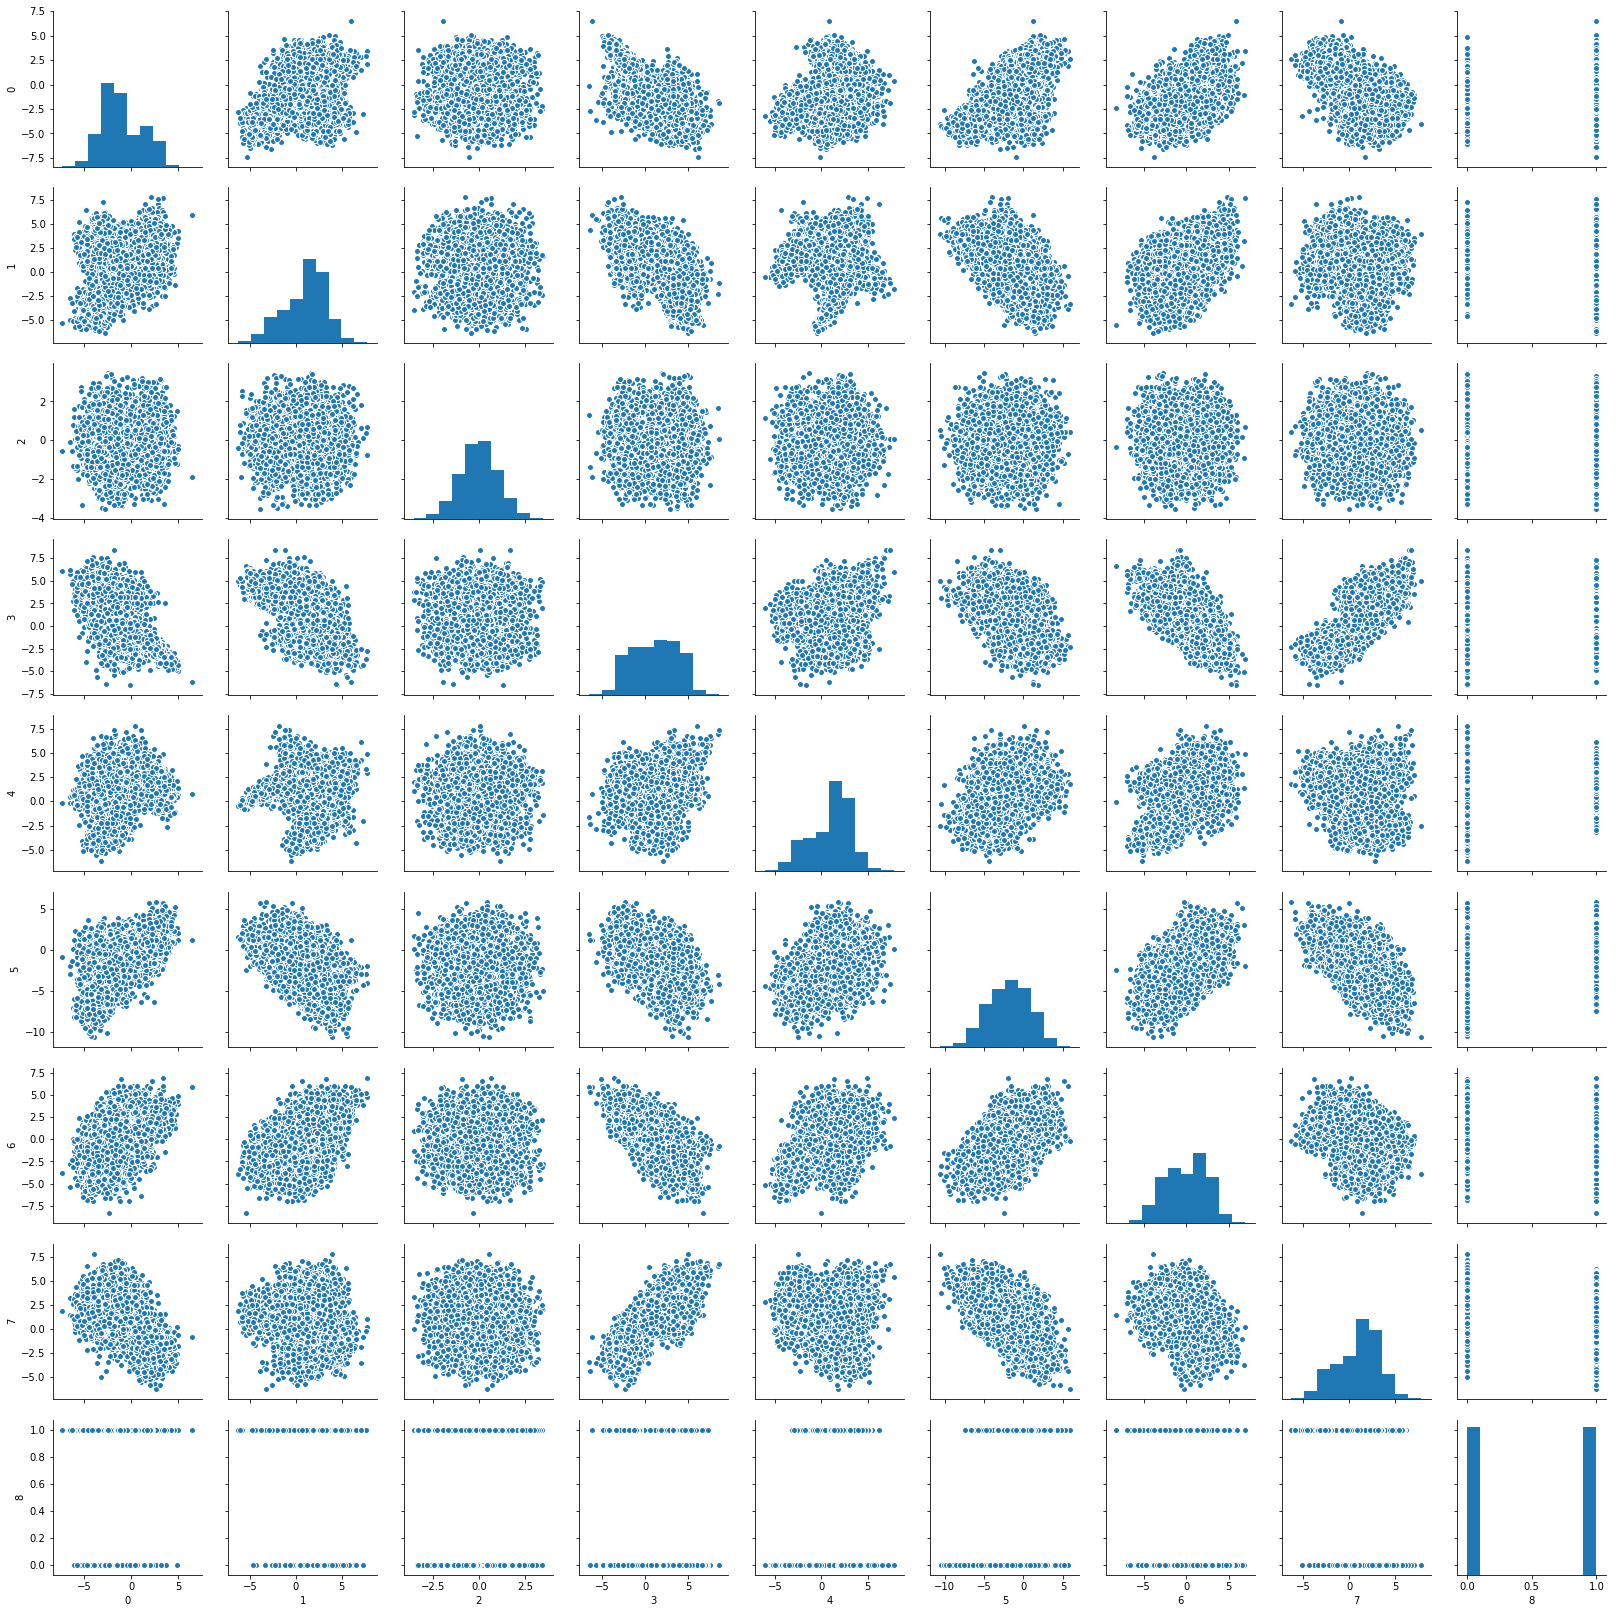

In [11]:
# Visualize data for each feature (pairplot,distplot).

sns.pairplot(df)

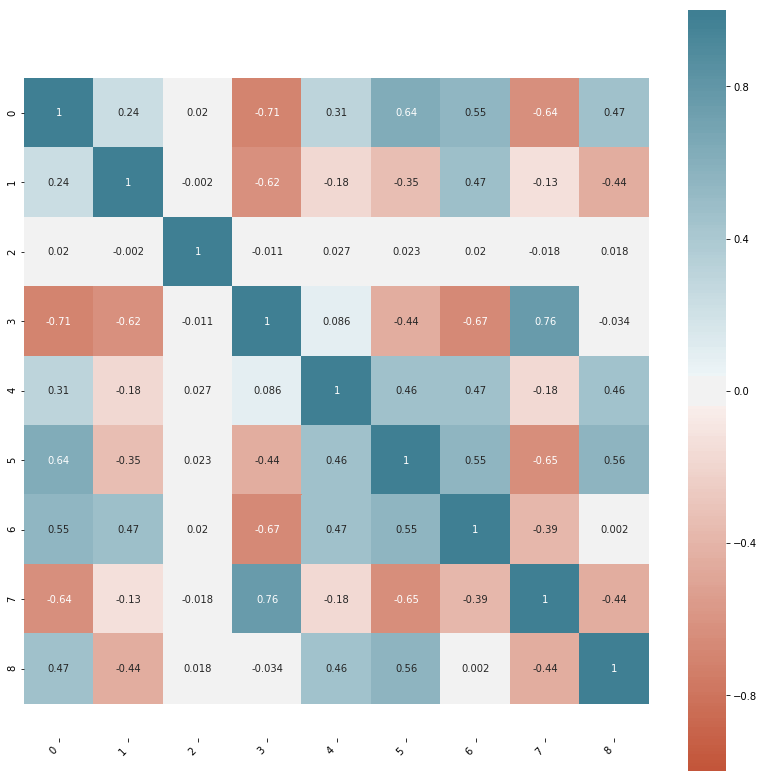

In [12]:
# Draw correlation matrix.
corr =df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [13]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
from scipy import stats
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.00566284, 1.15220659,
        0.99880072],
       [1.21562472, 1.62265494, 0.52187207, ..., 1.40338979, 0.51777165,
        1.00120072],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.48387509, 0.35998293,
        0.99880072],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.53475377, 0.55105502,
        1.00120072],
       [0.08336999, 0.15830524, 0.83152777, ..., 0.99626339, 0.9651887 ,
        1.00120072],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.24352619, 1.01322073,
        0.99880072]])

In [14]:
outliers = list(set(np.where(z > 2)[0]))

len(outliers)

2080

In [35]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,0,1,2,3,4,5,6,7,8
0,0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,5,-0.026304,-0.712668,1.290984,4.057603,2.568067,-2.968459,-2.841362,2.316500,1.0
5,6,-3.093468,1.817493,-0.446330,0.796296,1.325535,-2.172619,1.540533,0.839152,0.0
6,9,-3.249677,2.423485,-0.745789,0.378221,2.122584,-2.170585,2.260092,0.174337,0.0
7,10,0.344484,1.740974,-0.440449,-1.451382,-1.323397,-0.858445,0.514616,-0.053823,0.0
8,14,1.593044,0.222375,-0.023913,-1.129182,0.335173,1.166758,0.817419,-0.743750,1.0
9,15,-3.228521,-1.951219,1.341319,4.316287,2.199218,-2.077431,-2.469356,1.242965,1.0


7920

In [49]:
X_new = new_df.drop('index', axis = 1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.5610128 , 0.55288228, 0.11210355, ..., 0.50330839, 0.21200983,
        0.        ],
       [0.80342864, 0.90575648, 0.3691453 , ..., 0.85408023, 0.37070304,
        1.        ],
       [0.30098969, 0.45936171, 0.43484354, ..., 0.62331995, 0.59025856,
        0.        ],
       ...,
       [0.44143872, 0.644346  , 0.21513224, ..., 0.25311227, 0.66142752,
        0.        ],
       [0.66738467, 0.87076495, 0.63110786, ..., 0.6360884 , 0.36237777,
        1.        ],
       [0.4775441 , 0.4603908 , 0.7080072 , ..., 0.25186621, 0.74164059,
        1.        ]])

In [78]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train, cv = 3, n_jobs=-1)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))

Mean training accuracy: 1.0


In [80]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=5, random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

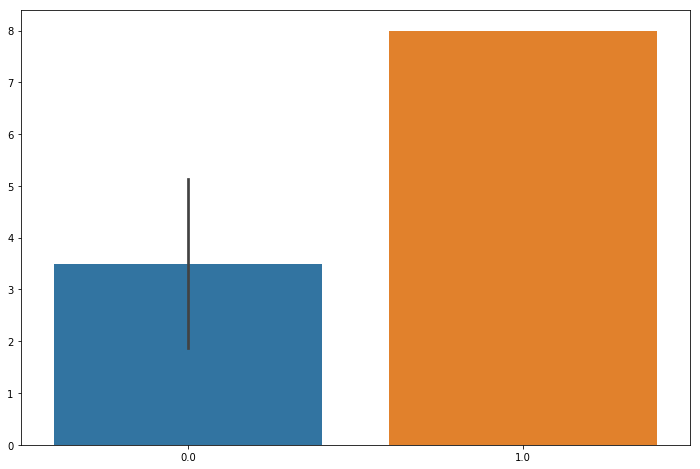

In [81]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X_new.columns)
plt.show()

In [89]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1237
          1       1.00      1.00      1.00      1139

avg / total       1.00      1.00      1.00      2376

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


In [2]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Visualize feature importances.


In [ ]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

In [ ]:
# Evaluate your result and select best performing algorithm for our case.